TWO BLOCK ATTACHED BY A SPRING AND EACH BLOCK ATTACHED TO A FIXED WALL BY A SPRING

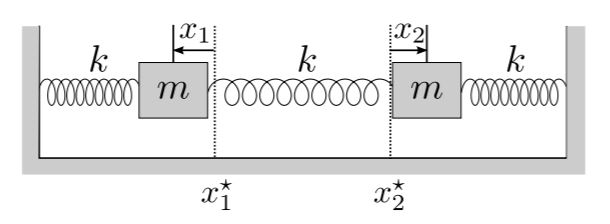

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp
from scipy.constants import g
from math import sin, cos
from IPython.display import HTML  
from sympy import *
from sympy import cos
from sympy.physics.mechanics import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

init_vprinting()

FORMING THE LAGRANGIAN AND DIFFERENTIAL EQUATION\
Here x is the position of the first particle and y position of the second particle

The LAGRANGIAN for the system is 

$L=\frac12 m (\dot x ^2+\dot y ^2)- \frac12 k x^2- \frac12 k (x-y)^2- \frac12 k y^2$ , where x,y are the displacement of the first and the 2nd block respectively

In [2]:
# symbols
m,t,k= symbols('m t k ')
x,y = dynamicsymbols('x y')

# derivatives
x_dot = diff(x, t)
x_ddot = diff(x_dot, t)
y_dot=diff(y,t)
y_ddot=diff(y_dot,t)
# Lagrangian
T = 1/2*m*(x_dot**2+y_dot**2)
V = 0.5*k*x**2+0.5*k*(x-y)**2+0.5*k*y**2
L = T - V
# Euler-Lagrange
eqn = diff( diff(L, x_dot), t) - diff(L, x)
sln = solve(eqn,x_ddot)[0]
Eq(x_ddot, sln)

In [3]:
#solving  Euler-Lagrange 
eqn=diff(diff(L,y_dot),t)-diff(L,y)
sln=solve(eqn,y_ddot)[0]
Eq(y_ddot,sln)

SOLVING THE DIFFERENTIAL EQUATION USING RUNGE KUTTA 4TH ORDER METHOD 

In [4]:

# Defining the system of first-order differential equations
def system_of_equations(t, variables):
    u, x, y, s = variables
    
    dxdt = u
    dudt = k * (-2 * x + y) / m
    dydt = s
    dsdt = k * (x - 2 * y) / m
    return [dudt, dxdt, dydt, dsdt]  

def runge_kutta_4th_order(h, t, variables):
    k1 = np.multiply(h, system_of_equations(t, variables))
    k2 = np.multiply(h, system_of_equations(t + h/2, np.add(variables, k1/2)))
    k3 = np.multiply(h, system_of_equations(t + h/2, np.add(variables, k2/2)))
    k4 = np.multiply(h, system_of_equations(t + h, np.add(variables, k3)))

    return np.add(variables, (k1 + 2*k2 + 2*k3 + k4)/6)

# initial conditions and parameters
t0 = 0.0  
t_max = 10.0  
h = 0.01  
u0 = 0.0  
x0 = 1.0  
y0 = 3.0  
s0 = 0.0 

t_values = [t0]
variables = [u0, x0, y0, s0]

# Parameters for the system
m = 1.0  # Mass
k = 5.0  # Spring constant

t = t0
u_values = [u0]
x_values = [x0]
y_values=[y0]
s_values=[s0]
time=[t0]
while t < t_max:
    variables = runge_kutta_4th_order(h, t, variables)
    t += h
    t_values.append(t)
    u_values.append(variables[0])
    x_values.append(variables[1])
    y_values.append(variables[2])
    s_values.append(variables[3])
    time.append(t)



plotting x vs $\dot x$ \
in this case $p=m\dot q$ and i choose m=1 for simplicity 

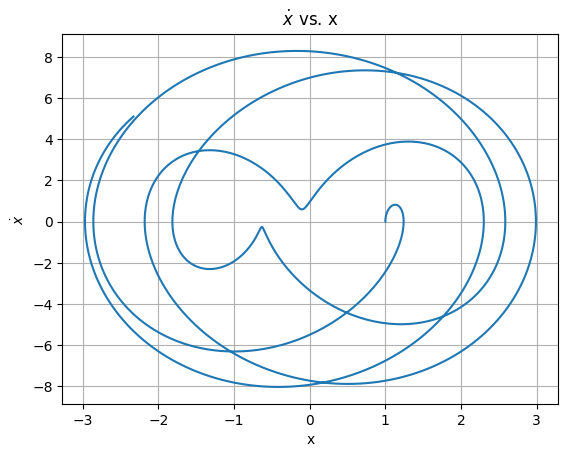

In [5]:
plt.plot(x_values, u_values)
plt.xlabel('x')
plt.ylabel('$\dot x$')
plt.title('$\dot x$ vs. x')
plt.grid(True)
plt.show()


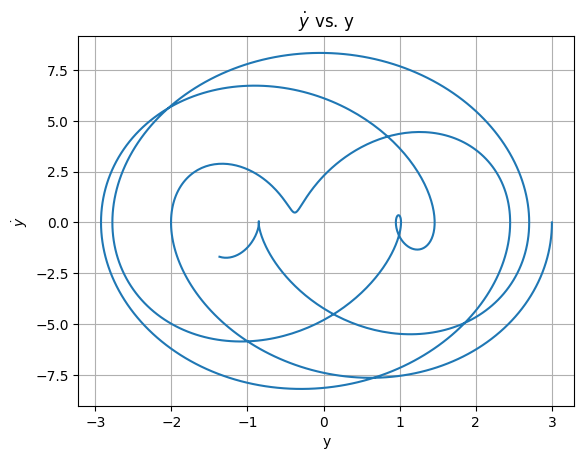

In [7]:
plt.plot(y_values, s_values)
plt.xlabel('y')
plt.ylabel('$\dot y$')
plt.title('$\dot y$ vs. y')
plt.grid(True)
plt.show()


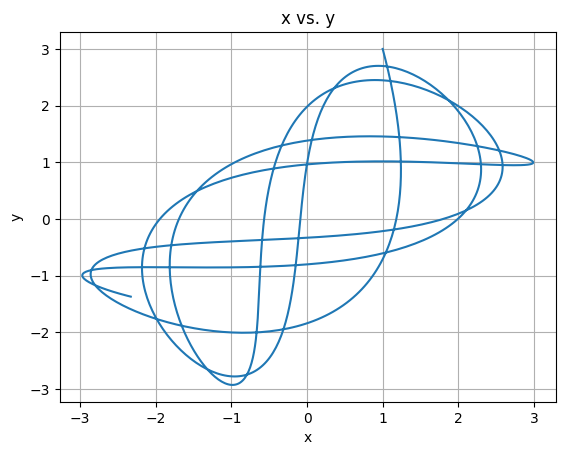

In [8]:
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs. y')
plt.grid(True)
plt.show()


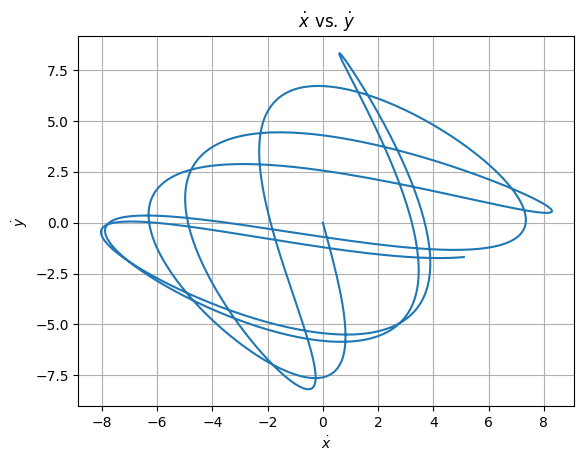

In [9]:
plt.plot(u_values, s_values)
plt.xlabel('$\dot x$')
plt.ylabel('$\dot y$')
plt.title('$\dot x$ vs. $\dot y$')
plt.grid(True)
plt.show()

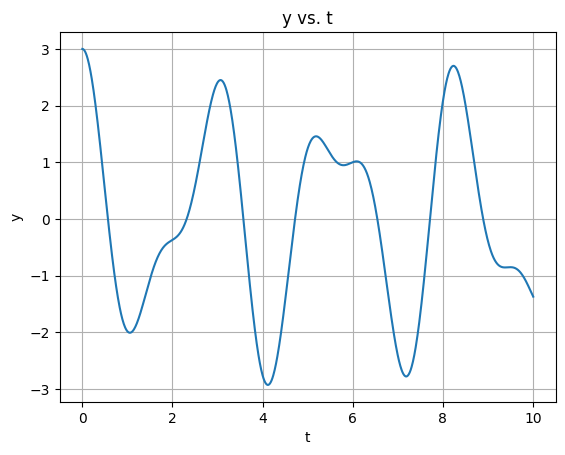

In [10]:
plt.plot(time,y_values)
plt.xlabel('t')
plt.ylabel('y')
plt.title('y vs. t')
plt.grid(True)
plt.show()

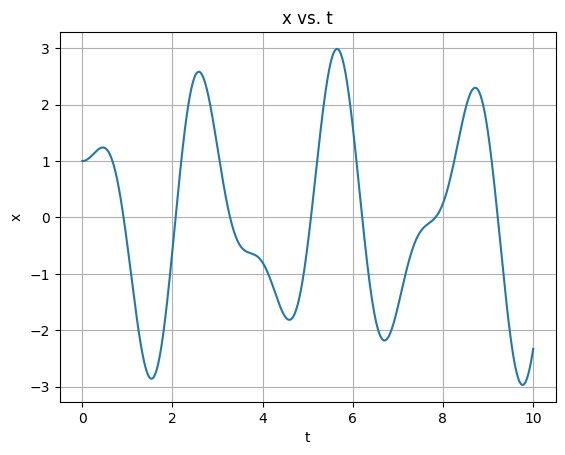

In [11]:
plt.plot(time,x_values)
plt.xlabel('t')
plt.ylabel('x')
plt.title('x vs. t')
plt.grid(True)
plt.show()

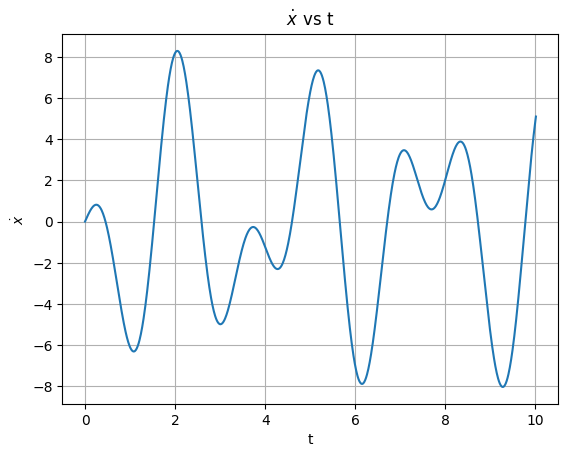

In [12]:
plt.plot(time,u_values)
plt.xlabel('t')
plt.ylabel('$\dot x$')
plt.title('$\dot x$ vs t')
plt.grid(True)
plt.show()

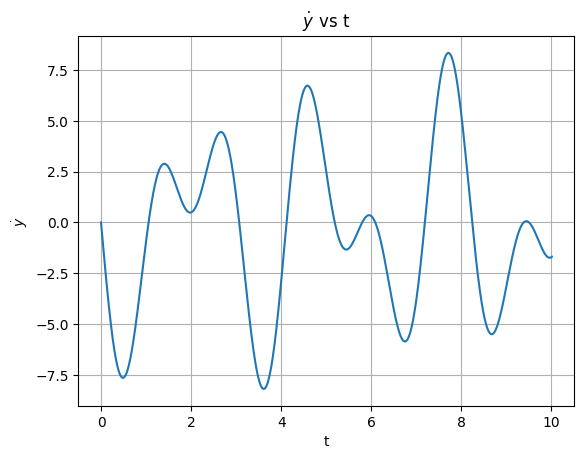

In [13]:
plt.plot(time,s_values)
plt.xlabel('t')
plt.ylabel('$\dot y$')
plt.title('$\dot y$ vs t')
plt.grid(True)
plt.show()

ANIMATION !LAGRANGE IN ACTION

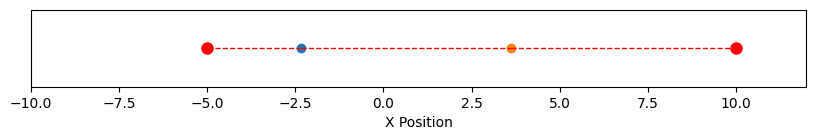

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Creating an animation function
fig, ax = plt.subplots(figsize=(10, 1))
ax.set_xlim(-10, 12)  
ax.set_ylim(-1, 1)  
ax.set_xlabel('X Position')
ax.set_yticks([])  

# Adding fixed points at x = -5 and x = 10
fixed_point1, = ax.plot(-5, 0, 'ro', markersize=8, label='Fixed Point 1')
fixed_point2, = ax.plot(10, 0, 'ro', markersize=8, label='Fixed Point 2')

particle1, = ax.plot([], [], 'o-', lw=2, label='Particle 1')  
particle2, = ax.plot([], [], 'o-', lw=2, label='Particle 2')  

line_to_fixed_point1, = ax.plot([], [], 'r--', lw=1) 
line_to_fixed_point2, = ax.plot([], [], 'r--', lw=1)  
line_bet_particle, = ax.plot([], [], 'r--', lw=1) 

def animate(i):
    particle1.set_data(x_values[i], 0)  
    particle2.set_data(y_values[i] + 5, 0) 
    

    line_to_fixed_point1.set_data([x_values[i], -5], [0, 0])
    line_to_fixed_point2.set_data([y_values[i] + 5, 10], [0, 0])
    

    line_bet_particle.set_data([x_values[i], y_values[i] + 5], [0, 0])

    return particle1, particle2, line_to_fixed_point1, line_to_fixed_point2, line_bet_particle

ani = FuncAnimation(fig, animate, frames=len(x_values), repeat=False, blit=True)


HTML(ani.to_jshtml())
